https://geographicdata.science/book/notebooks/04_spatial_weights.html

In [1]:
import contextily
import geopandas
import rioxarray
import seaborn
import pandas 
import numpy
import matplotlib.pyplot as plt
from shapely.geometry import Polygon
from pysal.lib import cg as geometry

# Spatial Weights空間權重

In [5]:
from pysal.lib import weights

## Contiguity Weights 鄰接權重

In [10]:
# Get points in a grid
l = numpy.arange(3)
xs, ys = numpy.meshgrid(l, l)
# Set up store
polys = []
# Generate polygons
for x, y in zip(xs.flatten(), ys.flatten()):
    poly = Polygon([(x, y), (x+1, y), (x+1, y+1), (x, y+1)])
    polys.append(poly)
# Convert to GeoSeries
polys = geopandas.GeoSeries(polys)
gdf = geopandas.GeoDataFrame(
    {
        'geometry': polys, 
        'id': ['P-%s'%str(i).zfill(2) for i in range(len(polys))]
    }
)

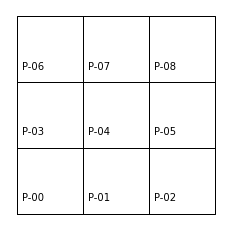

In [11]:
# Plot grid geotable
ax = gdf.plot(facecolor='w', edgecolor='k')

# Loop over each cell and add the text
for x, y, t in zip(
    [p.centroid.x-.25 for p in polys],
    [p.centroid.y-.25 for p in polys],
    [i for i in gdf['id']]
):
    plt.text(
        x, y, t, verticalalignment='center', horizontalalignment='center'
    )
    
# Remove axes
ax.set_axis_off()
plt.show()

### Rook:多邊形共用同一個邊

In [12]:
# Build a regular 3x3 lattice and draw it here
wr = weights.contiguity.Rook.from_dataframe(gdf)

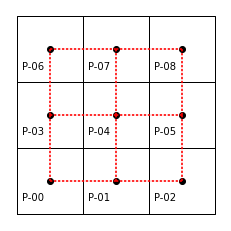

In [20]:
# Set up figure
f,ax = plt.subplots(1,1, subplot_kw=dict(aspect='equal'))
# Plot grid
gdf.plot(facecolor='w', edgecolor='k', ax=ax)
# Loop over each cell and add the text
for x, y, t in zip(
    [p.centroid.x-.25 for p in polys],
    [p.centroid.y-.25 for p in polys],
    [i for i in gdf['id']]
):
    plt.text(
        x, y, t, verticalalignment='center', horizontalalignment='center'
    )
# Plot weights connectivity
wr.plot(gdf, edge_kws=dict(color='r', linestyle=':'), ax =ax)
# Remove axes
ax.set_axis_off()

In [13]:
wr.neighbors

{0: [1, 3],
 1: [0, 2, 4],
 2: [1, 5],
 3: [0, 4, 6],
 4: [1, 3, 5, 7],
 5: [8, 2, 4],
 6: [3, 7],
 7: [8, 4, 6],
 8: [5, 7]}

In [16]:
pandas.DataFrame(*wr.full()).astype(int)

,0,1,2,3,4,5,6,7,8
0,0,1,0,1,0,0,0,0,0
1,1,0,1,0,1,0,0,0,0
2,0,1,0,0,0,1,0,0,0
3,1,0,0,0,1,0,1,0,0
4,0,1,0,1,0,1,0,1,0
5,0,0,1,0,1,0,0,0,1
6,0,0,0,1,0,0,0,1,0
7,0,0,0,0,1,0,1,0,1
8,0,0,0,0,0,1,0,1,0


In [17]:
# 計算非0的數量
wr.nonzero

24

### Queen:多邊形共用一個或多個點

In [21]:
# Build a regular 3x3 lattice and draw it here
wq = weights.contiguity.Queen.from_dataframe(gdf)

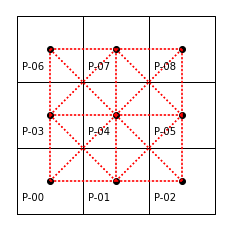

In [22]:
# Set up figure
f,ax = plt.subplots(1,1, subplot_kw=dict(aspect='equal'))
# Plot grid
gdf.plot(facecolor='w', edgecolor='k', ax=ax)
# Loop over each cell and add the text
for x, y, t in zip(
    [p.centroid.x-.25 for p in polys],
    [p.centroid.y-.25 for p in polys],
    [i for i in gdf['id']]
):
    plt.text(
        x, y, t, verticalalignment='center', horizontalalignment='center'
    )
# Plot weights connectivity
wq.plot(gdf, edge_kws=dict(color='r', linestyle=':'), ax =ax)
# Remove axes
ax.set_axis_off()

In [23]:
wq.neighbors

{0: [1, 3, 4],
 1: [0, 2, 3, 4, 5],
 2: [1, 4, 5],
 3: [0, 1, 4, 6, 7],
 4: [0, 1, 2, 3, 5, 6, 7, 8],
 5: [1, 2, 4, 7, 8],
 6: [3, 4, 7],
 7: [3, 4, 5, 6, 8],
 8: [4, 5, 7]}

In [24]:
pandas.DataFrame(*wq.full()).astype(int)

,0,1,2,3,4,5,6,7,8
0,0,1,0,1,1,0,0,0,0
1,1,0,1,1,1,1,0,0,0
2,0,1,0,0,1,1,0,0,0
3,1,1,0,0,1,0,1,1,0
4,1,1,1,1,0,1,1,1,1
5,0,1,1,0,1,0,0,1,1
6,0,0,0,1,1,0,0,1,0
7,0,0,0,1,1,1,1,0,1
8,0,0,0,0,1,1,0,1,0


In [25]:
wq.nonzero

40

In [28]:
# 權重值和neighbors有一對一的關係
wq.weights

{0: [1.0, 1.0, 1.0],
 1: [1.0, 1.0, 1.0, 1.0, 1.0],
 2: [1.0, 1.0, 1.0],
 3: [1.0, 1.0, 1.0, 1.0, 1.0],
 4: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 5: [1.0, 1.0, 1.0, 1.0, 1.0],
 6: [1.0, 1.0, 1.0],
 7: [1.0, 1.0, 1.0, 1.0, 1.0],
 8: [1.0, 1.0, 1.0]}

In [29]:
# 相鄰數
wq.cardinalities

{0: 3, 1: 5, 2: 3, 3: 5, 4: 8, 5: 5, 6: 3, 7: 5, 8: 3}

In [32]:
# 次數分配
wq.histogram

[(3, 4), (4, 0), (5, 4), (6, 0), (7, 0), (8, 1)]

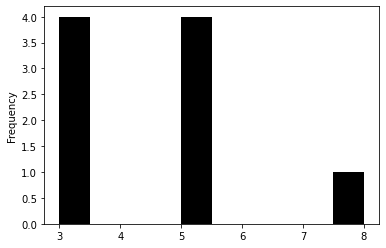

In [33]:
# 直方圖
pandas.Series(wq.cardinalities).plot.hist(color='k');

In [34]:
# 連接數
wq.s0

40.0

In [39]:
# 連接密度：連接數/空間數^2 = 40 / 9^2
wq.pct_nonzero

49.382716049382715

### Case：census tracts in San Diego, California.

In [44]:
san_diego_tracts = geopandas.read_file('./data/sandiego/sandiego_tracts.gpkg')
w_queen = weights.contiguity.Queen.from_dataframe(san_diego_tracts)

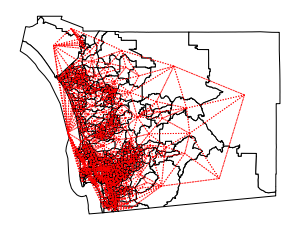

In [20]:
# Plot tract geography
f,ax = plt.subplots(1,2,figsize=(8,4))
for i in range(2):
    ax = san_diego_tracts.plot(edgecolor='k', facecolor='w', ax=ax[i])
    # Plot graph connections
    w_queen.plot(
        san_diego_tracts, 
        ax=ax[i], 
        edge_kws=dict(color='r', linestyle=':', linewidth=1),
        node_kws=dict(marker='')
    )
# Remove the axis
    ax[i].set_axis_off()
ax[1].axis([-13040000,  -13020000, 3850000, 3860000])

628
1.018296888311899


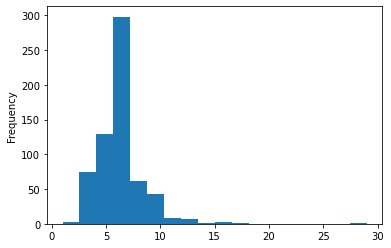

In [60]:
# 空間數
print(w_queen.n)
# 連接密度
print(w_queen.pct_nonzero)
# 次數分配
s = pandas.Series(w_queen.cardinalities)
s.plot.hist(bins=s.unique().shape[0]);

In [59]:
# Rook
w_rook = weights.contiguity.Rook.from_dataframe(san_diego_tracts)

628
0.8722463385938578


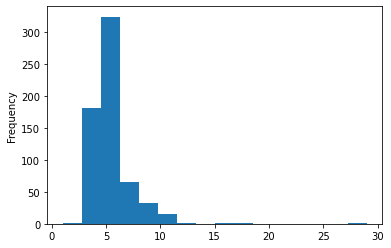

In [61]:
# 空間數
print(w_rook.n)
# 連接密度
print(w_rook.pct_nonzero)
# 次數分配
s = pandas.Series(w_rook.cardinalities)
s.plot.hist(bins=s.unique().shape[0]);

---
## Distance Based Weights 基於距離的權重
### K-Nearest Neighbor weights

In [62]:
# 以多邊形的中心點代表，k=4
wk4 = weights.distance.KNN.from_dataframe(san_diego_tracts, k=4)

In [64]:
# 沒有孤島問題
wk4.islands

[]

In [67]:
# 每個空間的連接數都是4
wk4.histogram

[(4, 628)]

### Kernel weights¶

In [68]:
w_kernel = weights.distance.Kernel.from_dataframe(gdf)

In [69]:
# 預設使用triangular
# bandwidth distance equal to the maximum knn=2 distance for all observations.
w_kernel.function

'triangular'

In [71]:
# 帶寬
w_kernel.bandwidth[0:5]

array([[1.0000001],
       [1.0000001],
       [1.0000001],
       [1.0000001],
       [1.0000001]])

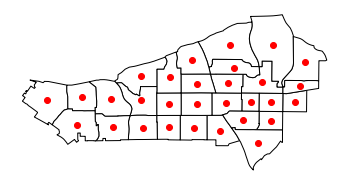

In [73]:
# Create subset of tracts
sub_30 = san_diego_tracts.query("sub_30 == True")
# Plot polygons
ax = sub_30.plot(facecolor='w', edgecolor='k')
# Create and plot centroids
sub_30.head(30).centroid.plot(color='r', ax=ax)
# Remove axis
ax.set_axis_off();

In [76]:
# Build weights with adaptive bandwidth(變動帶寬 fixde=False)
w_adaptive = weights.distance.Kernel.from_dataframe(
    sub_30,fixed=False, k=15
)
# Print first five bandwidth values
w_adaptive.bandwidth[:5]

array([[7065.74020822],
       [3577.22591841],
       [2989.74807871],
       [2891.46196945],
       [3965.08354232]])

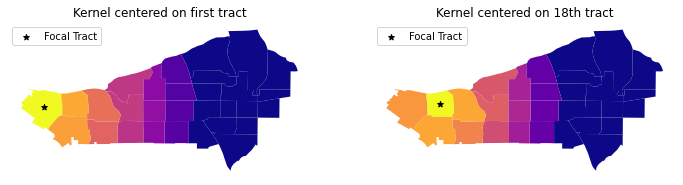

In [77]:
# Create full matrix version of weights
full_matrix, ids = w_adaptive.full()
# Set up figure with two subplots in a row
f,ax = plt.subplots(
    1, 2, figsize=(12,6), subplot_kw=dict(aspect='equal')
)
# Append weights for first polygon and plot on first subplot
sub_30.assign(
    weight_0 = full_matrix[0]
).plot("weight_0", cmap='plasma', ax=ax[0])
# Append weights for 18th polygon and plot on first subplot
sub_30.assign(
    weight_18 = full_matrix[17]
).plot("weight_18", cmap='plasma', ax=ax[1])
# Add centroid of focal tracts
sub_30.iloc[[0], :].centroid.plot(
    ax=ax[0], marker="*", color="k", label='Focal Tract'
)
sub_30.iloc[[17], :].centroid.plot(
    ax=ax[1], marker="*", color="k", label='Focal Tract'
)
# Add titles
ax[0].set_title("Kernel centered on first tract")
ax[1].set_title("Kernel centered on 18th tract")
# Remove axis
[ax_.set_axis_off() for ax_ in ax]
# Add legend
[ax_.legend(loc='upper left') for ax_ in ax];

### Distance bands and hybrid Weights

In [78]:
w_bdb = weights.distance.DistanceBand.from_dataframe(
    gdf, 1.5, binary=True
)

In [80]:
w_hy = weights.distance.DistanceBand.from_dataframe(
    gdf, 1.5, binary=False
)

In [84]:
wq.weights[4]

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

In [85]:
w_hy.weights[4]

[0.7071067811865475,
 1.0,
 0.7071067811865475,
 1.0,
 1.0,
 0.7071067811865475,
 1.0,
 0.7071067811865475]